# Extracting, Loading, and Transforming Data from an OMOP CDM Database with EHRData
ehrdata is a flexible data structure which supports useful operations to read the OMOP CDM standard. As a follow, it enables the application of ehrapy- and ecosystem-analyses.

ehrdata hosts a suite of functions required to process this data for machine learning models.

ehrdata operates on the notion of an "observation". One observation usually is information of one person over a specified time interval.
Typically, the presence of a person is specified by the definition of a cohort, and the observed time interval is specified by the research question.

In the ehrapy ecosystem and tutorials, we try to use language consistent with the OHDSI definitions, concepts, and tools.

data in the ehrdata format enables to use and leverage ehrapy's many exploratory analysis functionalities.

## OMOP
[OMOP](https://ohdsi.github.io/CommonDataModel/index.html) is a data model by [OHDSI](https://www.ohdsi.org/).

## Demo
### MIMIC IV OMOP Demo Dataset
Dataset available on [Physionet](https://physionet.org/content/mimic-iv-demo-omop/0.9/).

It describes ... .

Dataset:<br>
Kallfelz, M., Tsvetkova, A., Pollard, T., Kwong, M., Lipori, G., Huser, V., Osborn, J., Hao, S., & Williams, A. (2021). MIMIC-IV demo data in the OMOP Common Data Model (version 0.9). PhysioNet. https://doi.org/10.13026/p1f5-7x35.

Physionet:<br>
Goldberger, A., Amaral, L., Glass, L., Hausdorff, J., Ivanov, P. C., Mark, R., ... & Stanley, H. E. (2000). PhysioBank, PhysioToolkit, and PhysioNet: Components of a new research resource for complex physiologic signals. Circulation [Online]. 101 (23), pp. e215–e220.

### Extract
Download data by zip or CLI.

### Load
Many backends are supported by ehrapy.
It is probably a good idea to have the data stored in a RDBMS.

Here, we use [duckdb](https://duckdb.org/)'s Python API to load csv tables as they are available from the link above. (which is absolutely useless for immediate purposes but why not)

In [ ]:
%load_ext autoreload
%autoreload 2

In [2]:
import anndata as ad
import duckdb
import ehrapy as ep
import ehrdata
import numpy as np

### Set up a local database connection

In [3]:
con = duckdb.connect()

Load the data into your database

In [4]:
ehrdata.dt.mimic_iv_omop(backend="duckdb", backend_handle=con)

Load downloaded tables from ehrapy_data/mimic-iv-demo-data-in-the-omop-common-data-model-0.9
missing tables:  [['concept'], ['vocabulary'], ['domain'], ['concept_class'], ['concept_relationship'], ['relationship'], ['concept_synonym'], ['concept_ancestor'], ['source_to_concept_map'], ['drug_strength']]


See what tables there are

In [5]:
tables = con.execute("SHOW TABLES;").fetchall()
tables

[('care_site',),
 ('cdm_source',),
 ('cohort',),
 ('cohort_definition',),
 ('condition_era',),
 ('condition_occurrence',),
 ('cost',),
 ('death',),
 ('device_exposure',),
 ('dose_era',),
 ('drug_era',),
 ('drug_exposure',),
 ('fact_relationship',),
 ('location',),
 ('measurement',),
 ('metadata',),
 ('note',),
 ('note_nlp',),
 ('observation',),
 ('observation_period',),
 ('payer_plan_period',),
 ('person',),
 ('procedure_occurrence',),
 ('provider',),
 ('specimen',),
 ('visit_detail',),
 ('visit_occurrence',)]

### Transform
ehrapy allows many reproducible, documented transformation steps to get data from its backend into formats that are
- useful for machine learning (sklearn & pypots)
- useful for exploratory analysis (ehrapy suite)
- useful for visualization (vitessce ehrapyviewer)



In [6]:
obs = ehrdata.io.extract_person(con)
obs.head()

,person_id,gender_concept_id,year_of_birth,month_of_birth,day_of_birth,birth_datetime,race_concept_id,ethnicity_concept_id,location_id,provider_id,care_site_id,person_source_value,gender_source_value,gender_source_concept_id,race_source_value,race_source_concept_id,ethnicity_source_value,ethnicity_source_concept_id
0,3589912774911670296,8507,2095,None,None,None,0,38003563,None,None,None,10009628,M,0,None,0,HISPANIC/LATINO,2000001408
1,-3210373572193940939,8507,2079,None,None,None,0,38003563,None,None,None,10011398,M,0,None,0,HISPANIC/LATINO,2000001408
2,-775517641933593374,8507,2149,None,None,None,8516,0,None,None,None,10004235,M,0,BLACK/AFRICAN AMERICAN,2000001406,None,0
3,-2575767131279873665,8507,2050,None,None,None,8516,0,None,None,None,10024043,M,0,BLACK/AFRICAN AMERICAN,2000001406,None,0
4,-8970844422700220177,8507,2114,None,None,None,8527,0,None,None,None,10038933,M,0,WHITE,2000001404,None,0


In [7]:
obs2 = ehrdata.io.extract_observation_period(con)
obs2.head()

,person_id,gender_concept_id,year_of_birth,month_of_birth,day_of_birth,birth_datetime,race_concept_id,ethnicity_concept_id,location_id,provider_id,...,gender_source_value,gender_source_concept_id,race_source_value,race_source_concept_id,ethnicity_source_value,ethnicity_source_concept_id,observation_period_id,observation_period_start_date,observation_period_end_date,period_type_concept_id
0,-3210373572193940939,8507,2079,None,None,None,0,38003563,None,None,...,M,0,None,0,HISPANIC/LATINO,2000001408,2193156378042005101,2146-05-28,2147-03-26,32828
1,-775517641933593374,8507,2149,None,None,None,8516,0,None,None,...,M,0,BLACK/AFRICAN AMERICAN,2000001406,None,0,8196716582395037703,2196-02-24,2196-06-22,32828
2,-2575767131279873665,8507,2050,None,None,None,8516,0,None,None,...,M,0,BLACK/AFRICAN AMERICAN,2000001406,None,0,-4712462436630318946,2116-06-25,2117-06-09,32828
3,-8970844422700220177,8507,2114,None,None,None,8527,0,None,None,...,M,0,WHITE,2000001404,None,0,-9178218221840740161,2148-09-10,2148-09-23,32828
4,4668337230155062633,8507,2073,None,None,None,8527,0,None,None,...,M,0,WHITE,2000001404,None,0,4438236770478758867,2116-12-02,2117-12-06,32828


##### Interlude - Irregularly sampled time series data
Electronic health records can be regarded as (that is, form a model of a person via) irregular sampling irregularly sampled time series.

Following notation and explanation from [Horn et al.](https://proceedings.mlr.press/v119/horn20a.html), a time series of a patient can be described as a set of tuples (t, z, m), where t denotes the time, z the observed value, and m a modality description of the measurement.

The time series can have different lengths, and a "typical" number of observed values might not exist.

Generally, an irregularly-sampled time series can be converted into a missing data problem by discretizing the time axis into non-overlapping intervals, and declaring intervals in which no data was sampled as missing (Bahadori & Lipton, 2019). [Horn et al.](https://proceedings.mlr.press/v119/horn20a.html).

EHRData's extract_XXXX extracts irregularly sampled time series from OMOP tables XXX.

TODO add illustration

EHRData's time_interval_table transforms this into the missing data problem with discretized time axis.

TODO add illustration


In [8]:
ts = ehrdata.io.extract_measurement(con)
ts

<Array [[[[], []], [...], ..., [[], []]], ...] type='100 * var * var * var ...'>

In [9]:
time_interval_table = ehrdata.io.time_interval_table(ts, obs2)
# ehrdata.io.time_interval_table(
#     duckdb_instance=duckdb,
#     start_time="patient_hospital_entry",  # TODO: sync with omop lingo; that could be "cohort index date", but maybe is something different. Ref: https://ohdsi.github.io/TheBookOfOhdsi/Cohorts.html time zero for the time interval matrix
#     observation_duration=250,  # in d, time end for the time interval matrix
#     concept_ids="all",  # features to use
#     interval_length=1,  # length of the  statustime intervals
#     interval_unit="minutes",  # unit of the time intervals
# )

In [13]:
np.array(time_interval_table).shape

TODO: all of this within edata. for now assemble it here for a rough vibe check

In [10]:
edata = ad.AnnData(X=None, obs=obs2)
edata.obsm["ts"] = ts
edata.obsm["time_interval_table"] = np.array(time_interval_table)
edata

AnnData object with n_obs × n_vars = 100 × 0
    obs: 'person_id', 'gender_concept_id', 'year_of_birth', 'month_of_birth', 'day_of_birth', 'birth_datetime', 'race_concept_id', 'ethnicity_concept_id', 'location_id', 'provider_id', 'care_site_id', 'person_source_value', 'gender_source_value', 'gender_source_concept_id', 'race_source_value', 'race_source_concept_id', 'ethnicity_source_value', 'ethnicity_source_concept_id', 'observation_period_id', 'observation_period_start_date', 'observation_period_end_date', 'period_type_concept_id'
    obsm: 'ts', 'time_interval_table'

In [ ]:
# create interval table
edata.time_interval_table(
    duckdb_instance=duckdb,
    start_time="patient_hospital_entry",  # TODO: sync with omop lingo; that could be "cohort index date", but maybe is something different. Ref: https://ohdsi.github.io/TheBookOfOhdsi/Cohorts.html time zero for the time interval matrix
    observation_duration=250,  # in d, time end for the time interval matrix
    concept_ids="all",  # features to use
    interval_length=1,  # length of the time intervals
    interval_unit="minutes",  # unit of the time intervals
)

In [13]:
# n_patients x n_intervals x n_features
np.array(edata.it).shape

### EDA
#### CohortTracker

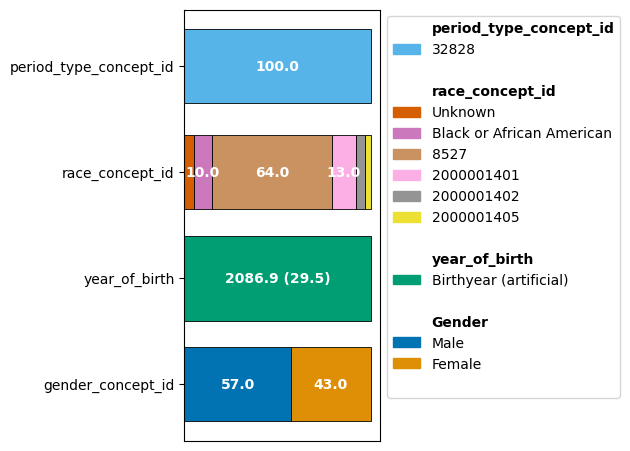

In [11]:
ct = ep.tl.CohortTracker(
    edata,
    columns=["gender_concept_id", "year_of_birth", "race_concept_id", "period_type_concept_id"],
    categorical=["gender_concept_id", "race_concept_id", "period_type_concept_id"],
)

ct(edata)

ct.plot_cohort_barplot(
    legend_labels={
        0: "Unknown",
        8516: "Black or African American",
        "year_of_birth": "Birthyear (artificial)",
        8507: "Male",
        8532: "Female",
    },
    legend_subtitles_names={"gender_concept_id": "Gender"},
)

#### Missing Values

<Axes: >

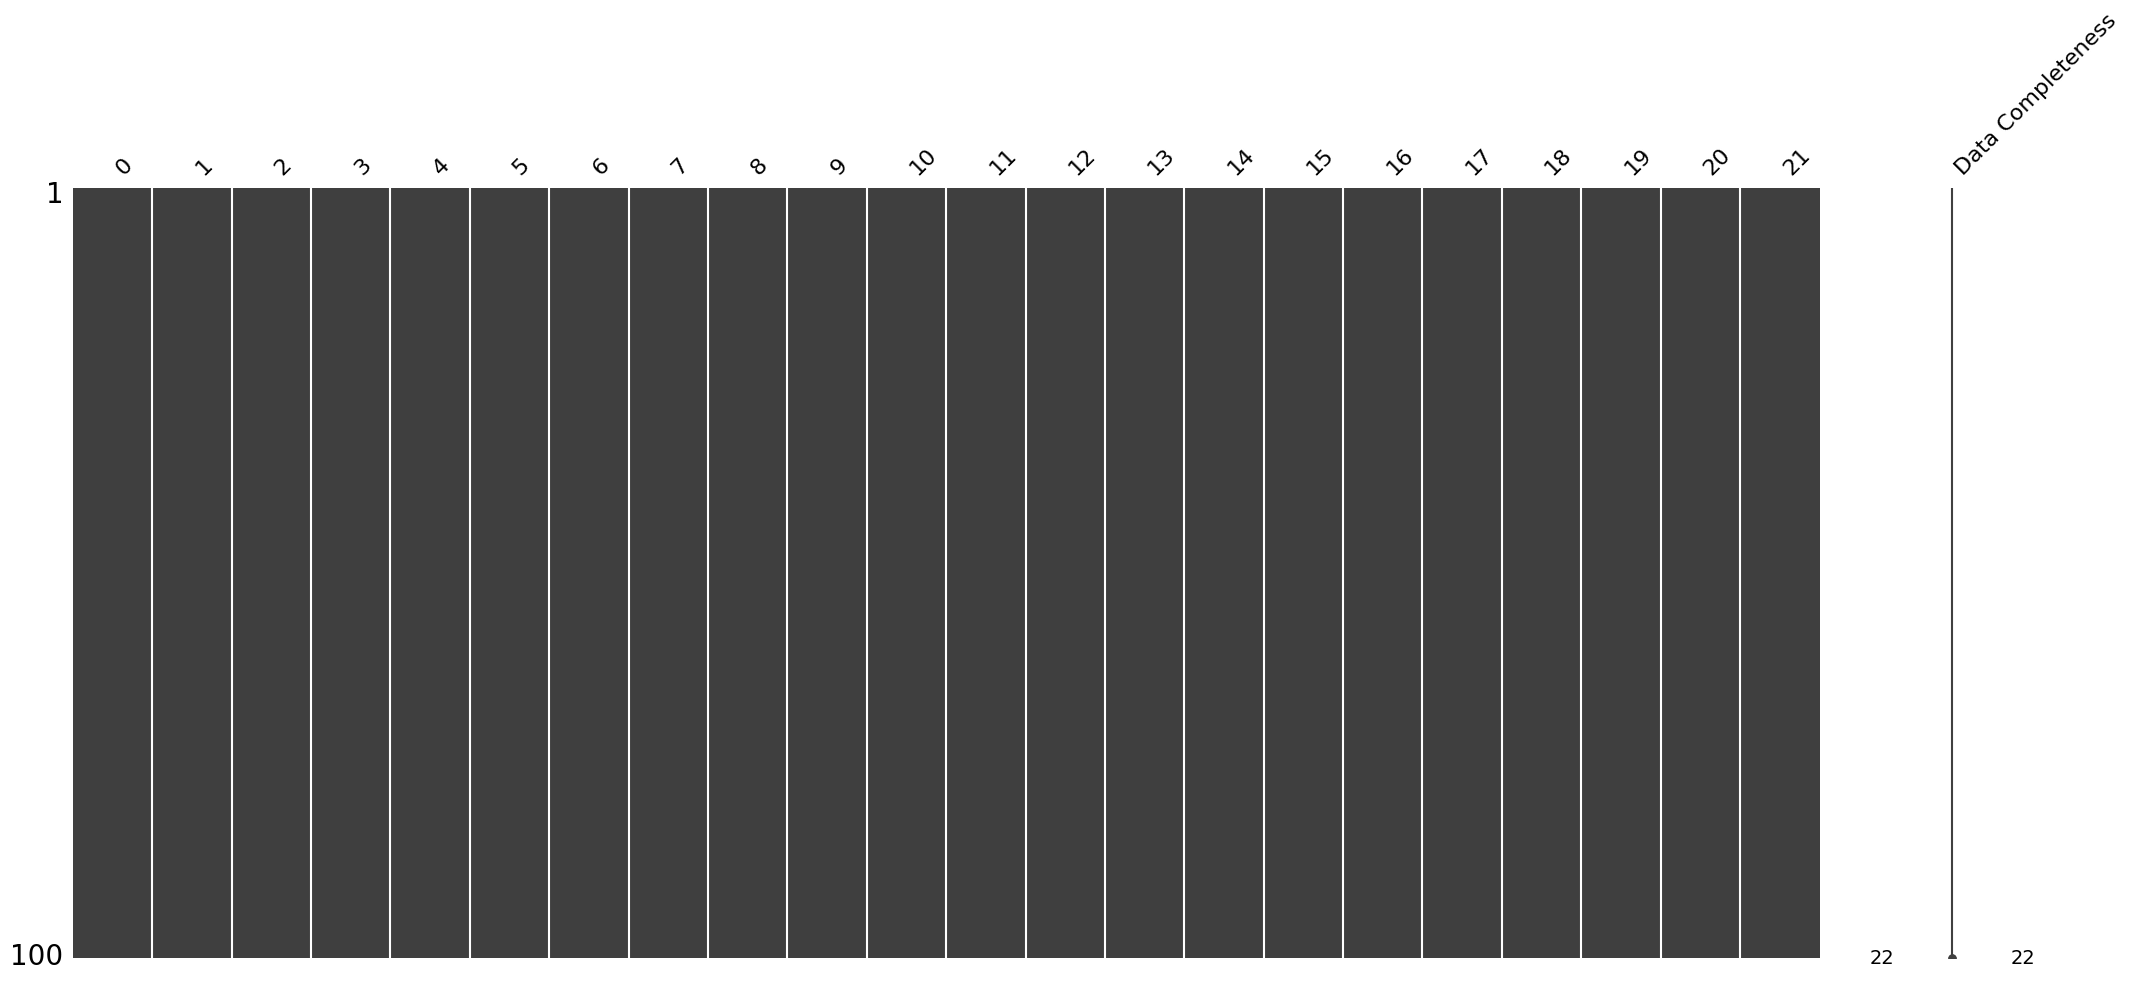

In [31]:
# ep.pl.missing_values_matrix(edata_as_anndata)  # TODO: also time series?

### Machine Learning
Ehrapy seamlessly integrates with machine learning libraries such as sklearn, or dedicated time series ML libraries like pypots.

#### PyPOTS impute or classify?
See [PyPOTS](https://docs.pypots.com/en/latest/examples.html) which operates on the time interval table generated by ehrapy.

```
!pip install pypots
```

In [35]:
from pypots.imputation import SAITS

In [42]:
# initialize the model
saits = SAITS(
    n_steps=11,
    n_features=450,
    n_layers=2,
    d_model=256,
    d_ffn=128,
    n_heads=4,
    d_k=64,
    d_v=64,
    dropout=0.1,
    epochs=3,
    saving_path="examples/saits",  # set the path for saving tensorboard logging file and model checkpoint
    model_saving_strategy="best",  # only save the model with the best validation performance
)

2024-08-23 14:11:30 [INFO]: No given device, using default device: cpu
2024-08-23 14:11:30 [INFO]: Model files will be saved to examples/saits/20240823_T141130
2024-08-23 14:11:30 [INFO]: Tensorboard file will be saved to examples/saits/20240823_T141130/tensorboard
2024-08-23 14:11:30 [INFO]: SAITS initialized with the given hyperparameters, the number of trainable parameters: 2,419,814


In [43]:
saits.fit({"X": np.array(edata.it)})
imputation = saits.impute({"X": np.array(edata.it)})

2024-08-23 14:11:32 [INFO]: Epoch 001 - training loss: 153.7664
2024-08-23 14:11:32 [INFO]: Saved the model to examples/saits/20240823_T141130/SAITS_epoch1_loss153.76637649536133.pypots
2024-08-23 14:11:32 [INFO]: Epoch 002 - training loss: 162.0959
2024-08-23 14:11:32 [INFO]: Epoch 003 - training loss: 163.6547
2024-08-23 14:11:32 [INFO]: Finished training. The best model is from epoch#1.
2024-08-23 14:11:32 [INFO]: Saved the model to examples/saits/20240823_T141130/SAITS.pypots


In [44]:
imputation

array([[[ 3.8334923e+00,  7.4824512e-02,  5.3885984e+00, ...,
         -1.9672710e-01,  1.2278686e+00,  1.7606061e+00],
        [ 3.8192391e+00,  6.5954238e-02,  5.4974842e+00, ...,
         -2.4046504e-01,  1.2477617e+00,  1.7412457e+00],
        [ 3.8143442e+00,  6.5979809e-02,  5.4906402e+00, ...,
         -2.4437267e-01,  1.2481689e+00,  1.7394999e+00],
        ...,
        [ 3.8215313e+00,  6.6506460e-02,  5.4998322e+00, ...,
         -2.4562079e-01,  1.2484723e+00,  1.7375542e+00],
        [ 3.8182511e+00,  6.6276051e-02,  5.4884953e+00, ...,
         -2.4466354e-01,  1.2491769e+00,  1.7389424e+00],
        [ 3.8367624e+00,  1.0000000e+00,  4.6991825e+00, ...,
         -2.5309700e-01,  1.3787152e+00,  1.6633894e+00]],

       [[ 3.8513041e+00,  4.3666318e-02,  5.3734140e+00, ...,
         -2.1152657e-01,  1.2032628e+00,  1.7398019e+00],
        [ 4.1300000e+02, -1.5000000e+01,  4.5032616e+00, ...,
         -3.3774734e-01,  1.4340875e+00,  1.6339254e+00],
        [ 4.1300000e+02, 

can also get representation: e.g. raindrop. prob. should do also for viz. below.

### Visualization
Now that data is in ehrdata, ehrapy's ecosystem vizualization options are available.

#### Vitessce

In [ ]:
# import vitessce
# set config
# show in notebook and refer to deposited viz on lamin

In [ ]:
con.close()